In [35]:
using ClusteringToMATo
using Distances
using NearestNeighbors
using Plots
using Random

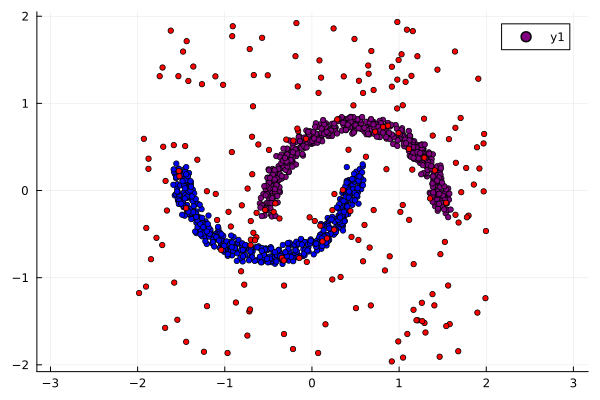

In [36]:
function noisy_circle(rng, n; r1=1, r2=1, noise=0.2)
    points = zeros(2, n)
    labels = Int[]
    for i in 1:2:n-1
        θ = π * rand(rng)
        x = r1 * cos(θ) + noise * rand(rng) - noise / 2 + 0.5
        y = r2 * sin(θ) + noise * rand(rng) - noise / 2 - 0.25
        points[:,i] .= (x, y)
        push!(labels, 1)
        x = r1 * cos(θ) + noise * rand(rng) - noise / 2 - 0.5
        y = - r2 * sin(θ) + noise * rand(rng) - noise / 2 + 0.25
        points[:,i+1] .= (x, y)
        push!(labels, 2)
        
    end
    return points, labels
end



rng = MersenneTwister(1234)
circle, labels = noisy_circle(rng, 1000)
points = hcat(circle, 4 .* rand(rng, 2,200) .- 2)
true_labels = vcat(labels, zeros(Int,200) )
scatter(points[1,:], points[2,:], c = true_labels,
aspect_ratio=1, ms = 3, palette = :rainbow)

In [37]:
graph = compute_graph(BallGraph(0.1), points);

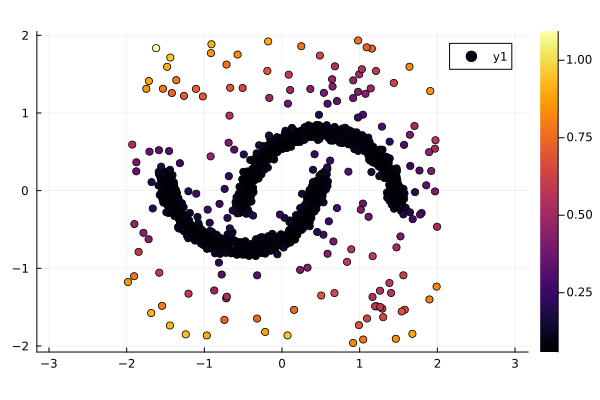

In [38]:
f = compute_density(DTM(30), points)
scatter(points[1,:], points[2,:], marker_z = f, aspect_ratio=1)

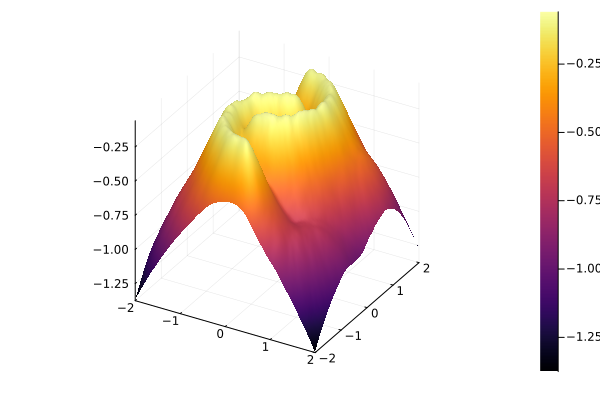

In [39]:
x = LinRange(-2,2,100)
y = LinRange(-2,2,100)
grid = vcat(x', y')

dtm = zeros(100,100)
kdtree = KDTree(points)
k = 30
for i = 1:100, j = 1:100
    idxs, dists = knn(kdtree, [x[i], y[j]], k)
    dtm[i, j] = sqrt(sum(dists.^2) / k)
end
surface(x, y, -dtm)

clusters : 0


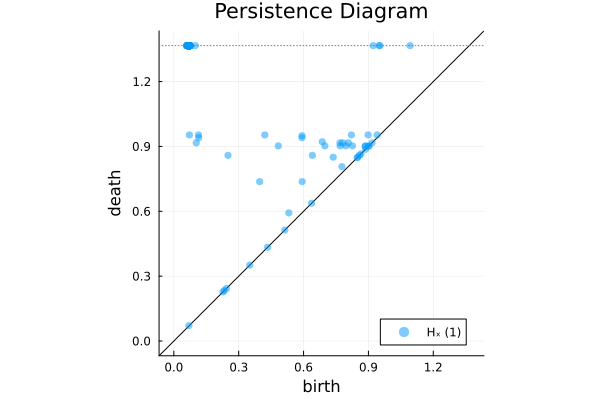

In [59]:
labels, intervals = compute_persistence( f, graph, Inf)

plot(intervals)

clusters : 2


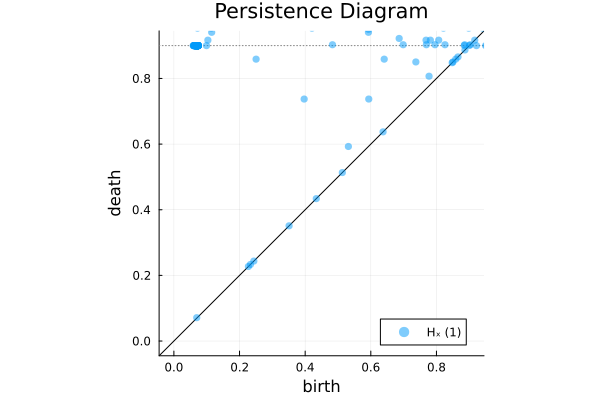

In [58]:
τ = 0.9
labels, intervals = compute_persistence( f, graph, τ)
plot(intervals)

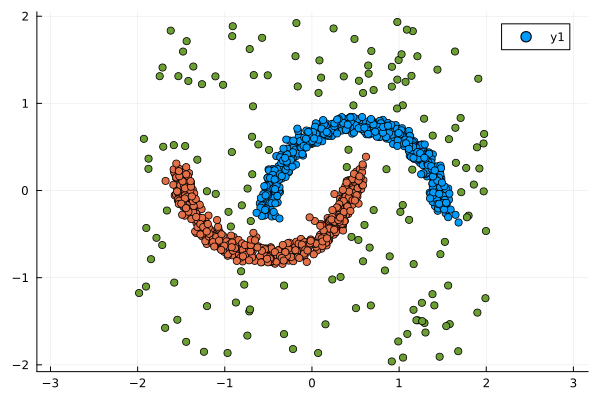

In [55]:
scatter(points[1,:], points[2,:], c = labels, aspect_ratio=1 )